In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [37]:
df = pd.read_csv('../data/processed/cleaned_data.csv')

In [38]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [40]:
df['Rating text'].head(10)

0    Excellent
1    Excellent
2    Very Good
3    Excellent
4    Excellent
5    Very Good
6    Very Good
7    Very Good
8    Excellent
9    Excellent
Name: Rating text, dtype: object

In [49]:
df['Rating text'].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

In [ ]:
def classify(rate):
    if rate > 3.5:
        return 'positive'
    elif rate < 2.5:
        return 'negative'
    else:
        return 'nuetral'

In [ ]:
df['sentiment'] = df['Aggregate rating'].apply(classify)

<Axes: xlabel='sentiment', ylabel='Count'>

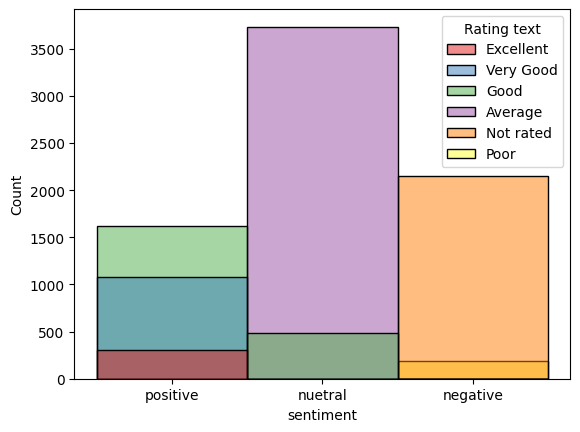

In [ ]:
sns.histplot(df, x = 'sentiment', hue = 'Rating text', palette = 'Set1')

In [ ]:
positive_words = [word for word in df[df["sentiment"] == "positive"]["Rating text"]]
nuetral_words = [word for word in df[df["sentiment"] == "nuetral"]["Rating text"]]
negative_words = [word for word in df[df["sentiment"] == "negative"]["Rating text"]]

In [ ]:
pos_counter = Counter(positive_words)
neu_counter = Counter(nuetral_words)
neg_counter = Counter(negative_words)

In [ ]:
print('Positive words:', list(pos_counter.items()))
print('Nuetral words:', list(neu_counter.items()))
print('Negative words:', list(neg_counter.items()))

Positive words: [('Excellent', 300), ('Very Good', 1078), ('Good', 1616)]
Nuetral words: [('Average', 3734), ('Good', 480)]
Negative words: [('Not rated', 2148), ('Poor', 186)]


In [43]:
df['Review Length'] = df['Rating text'].str.split().apply(len)

In [45]:
average = df['Review Length'].mean().round(1)

In [46]:
print('Average review length', average)

Average review length 1.3


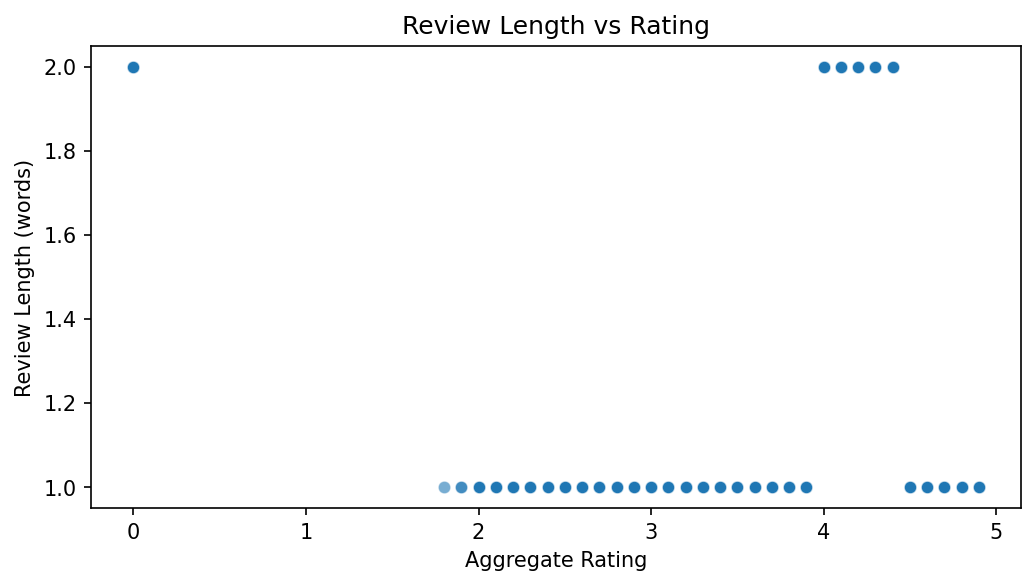

In [ ]:
plt.figure(figsize=(8, 4), dpi = 150)
sns.scatterplot(x="Aggregate rating", y="Review Length", data=df, alpha=0.6)
plt.title("Review Length vs Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Review Length (words)")
plt.show()

- Review Length and rating  is not related.
- Rating length is one for almost all restaruant.